In [1]:
import os
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datapath="/Users/xli77/Documents/MSIVA/results/SIVA"
subspace_struct_list=['234111','2222211','333111','441111']
num_iter=11
isi_um=np.zeros((4,4,num_iter))
isi_ummm=np.zeros((4,4,num_iter))
isi_mm=np.zeros((4,4,num_iter))
aux_um=np.zeros((4,4,num_iter))
aux_ummm=np.zeros((4,4,num_iter))
aux_mm=np.zeros((4,4,num_iter))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um.mat"))
    isi_um[i,i,:] = np.squeeze(data['isi_um'])
    a = np.squeeze(data['aux_um'][1,:])
    aux_um[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm.mat"))
    isi_ummm[i,i,:] = np.squeeze(data['isi_ummm'])
    a = np.squeeze(data['aux_ummm'][1,:])
    aux_ummm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm.mat"))
    isi_mm[i,i,:] = np.squeeze(data['isi_mm'])
    a = np.squeeze(data['aux_mm'][1,:])
    aux_mm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    incorrect_ss_list = list(range(4))
    incorrect_ss_list.remove(i)
    for j in incorrect_ss_list:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","um.mat"))
        isi_um[i,j,:] = np.squeeze(data['isi_um_s1'])
        a = np.squeeze(data['aux_um_s1'][1,:])
        aux_um[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","ummm.mat"))
        isi_ummm[i,j,:] = np.squeeze(data['isi_ummm_s1'])
        a = np.squeeze(data['aux_ummm_s1'][1,:])
        aux_ummm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","mm.mat"))
        isi_mm[i,j,:] = np.squeeze(data['isi_mm_s1'])
        a = np.squeeze(data['aux_mm_s1'][1,:])
        aux_mm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

In [3]:
isi_um_min = np.min(isi_um,axis=2)
isi_ummm_min = np.min(isi_ummm,axis=2)
isi_mm_min = np.min(isi_mm,axis=2)

isi_um_min_ind = np.argmin(isi_um,axis=2)
isi_ummm_min_ind = np.argmin(isi_ummm,axis=2)
isi_mm_min_ind = np.argmin(isi_mm,axis=2)

aux_um_min = np.min(aux_um,axis=2)
aux_ummm_min = np.min(aux_ummm,axis=2)
aux_mm_min = np.min(aux_mm,axis=2)

aux_um_min_ind = np.argmin(aux_um,axis=2)
aux_ummm_min_ind = np.argmin(aux_ummm,axis=2)
aux_mm_min_ind = np.argmin(aux_mm,axis=2)

print(aux_um_min)
print(aux_ummm_min)
print(aux_mm_min)

[[42.69163868 42.88364054 42.76165113 42.99218699]
 [42.64939864 42.2999005  42.85097599 42.8680394 ]
 [42.71959192 42.85787947 42.63506397 43.0995388 ]
 [43.09076913 43.23929925 43.17352401 42.9764492 ]]
[[42.67687912 42.86470472 42.75052939 43.03843311]
 [42.65588586 42.22912355 42.62781847 42.76436291]
 [42.6947989  42.86178266 42.62022519 43.04032558]
 [42.68928778 42.39724179 41.1201708  39.93684739]]
[[23.82415208 23.94737096 23.81949718 24.02788477]
 [27.76622709 27.44226515 27.80274844 28.16152244]
 [23.93111632 24.02946237 23.7786396  24.03622762]
 [17.26454813 18.66018158 17.28986256 17.5637204 ]]


In [4]:
# use loss to get ISI
isi_um_min_loss = np.zeros((4,4))
isi_ummm_min_loss = np.zeros((4,4))
isi_mm_min_loss = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        isi_um_min_loss[i,j] = isi_um[i,j,aux_um_min_ind[i,j]]
        isi_ummm_min_loss[i,j] = isi_ummm[i,j,aux_ummm_min_ind[i,j]]
        isi_mm_min_loss[i,j] = isi_mm[i,j,aux_mm_min_ind[i,j]]

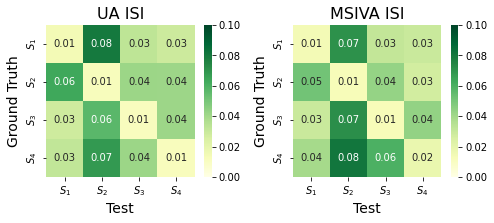

In [5]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))

sns.heatmap(isi_um_min,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA ISI",fontsize=16)
axes[0].set_ylabel("Ground Truth",fontsize=14)
axes[0].set_xlabel("Test",fontsize=14)

sns.heatmap(isi_ummm_min,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA ISI",fontsize=16)
axes[1].set_ylabel("Ground Truth",fontsize=14)
axes[1].set_xlabel("Test",fontsize=14)

plt.tight_layout()
# plt.savefig("simulation.pdf")

In [6]:
datapath="/Users/xli77/Documents/MSIVA/results/SIVA"
subspace_struct_list=['234111','2222211','333111','441111']

corr = np.zeros((4,8,12,12))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","A.mat"))
    A=np.squeeze(data['A'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um_W.mat"))
    W1=np.squeeze(data['W1'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm_W.mat"))
    W2=np.squeeze(data['W2'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm_W.mat"))
    W3=np.squeeze(data['W3'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","W.mat"))
    W=np.squeeze(data['W'])

    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]
    corr[i,4] = W3[0]@A[0]
    corr[i,5] = W3[1]@A[1]
    corr[i,6] = W[0]@A[0]
    corr[i,7] = W[1]@A[1]

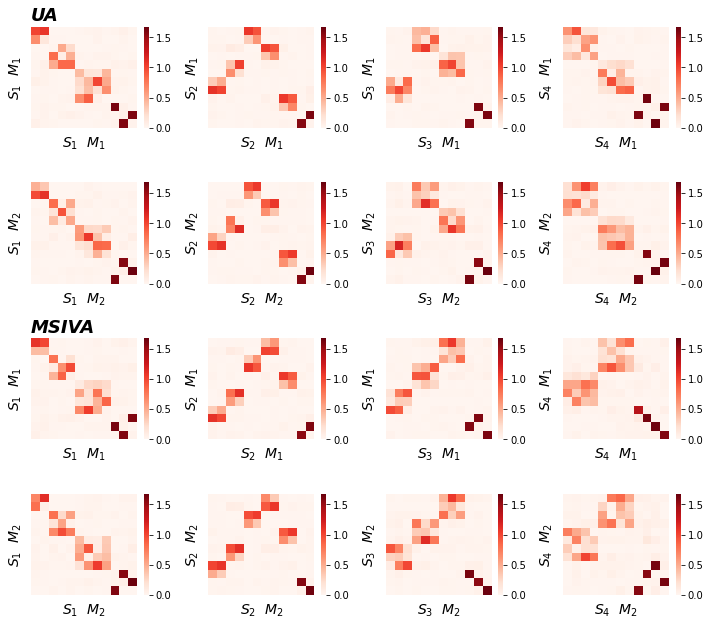

In [7]:
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2
fig,axes=plt.subplots(4,4,figsize=(10,2.2*4))

for i in range(4):
    for j in range(4):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i])
        axes[j,i].set_xlabel(f"$S_{i+1}$  $M_{j%2+1}$", fontsize=14)
        axes[j,i].set_ylabel(f"$S_{i+1}$  $M_{j%2+1}$", fontsize=14)
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j,i].set_title("UA", loc="left", fontsize=18, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            axes[j,i].set_title("MSIVA", loc="left", fontsize=18, fontstyle="italic", fontweight="bold")

plt.tight_layout()
# plt.savefig("simulation_absWA_red.pdf")